# **Import Library**

In [23]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# **Loading Dataset**

In [24]:
df=pd.read_csv('/content/train.csv')

In [25]:
df.head() # Check the dataset

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# **Data Cleaning**

In [26]:
df.shape # Check the shape of dataset

(550068, 12)

In [27]:
df.info() # Check the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [28]:
df.isnull().sum() # Check the missing value

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,173638


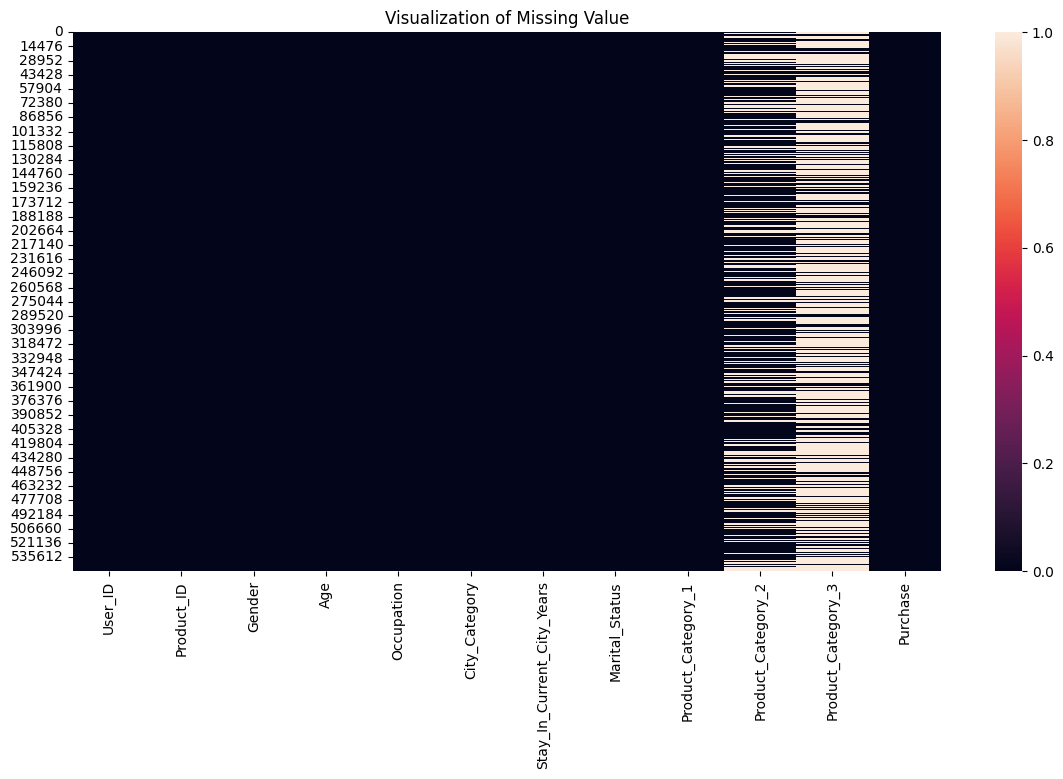

In [29]:
plt.figure(figsize=(14,7)) # set the size of the plot
sns.heatmap(df.isnull()) # Visualize missing values in the dataframe using a heatmap
plt.title('Visualization of Missing Value') # Set the title name of the plot
plt.show() # Display the boxplot

In [30]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mean()) # treatment of missing value by mean imputation

In [31]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mean()) # Treatment of missing value by mean imputation

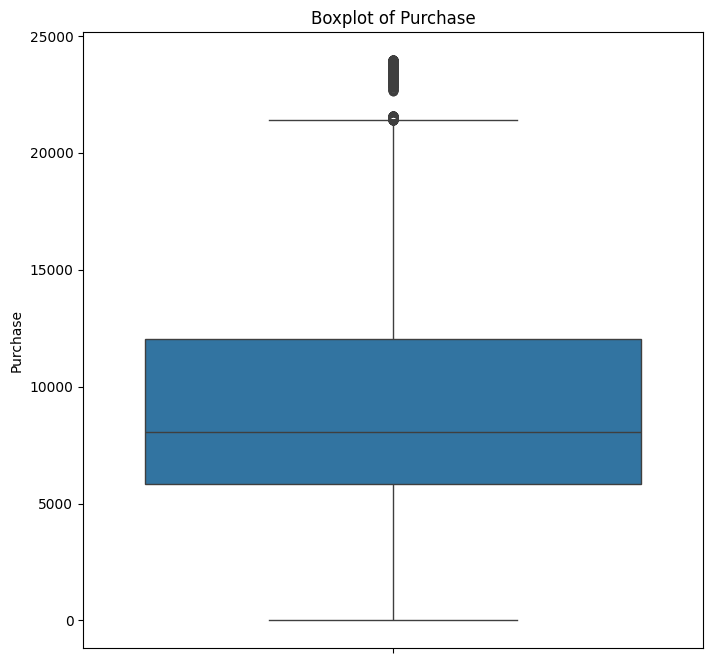

In [32]:
plt.figure(figsize=(8,8)) # Set the size of the plot
sns.boxplot(df['Purchase']) # Visulize Outlier by boxplot
plt.title('Boxplot of Purchase') # Set the title name of the boxplot
plt.show() # Display the boxplot

**This boxplot tells us that most people are buying things in the middle range, roughly between 6,000 and 12,000. However, those few little dots at the very top—the outliers—are really important! They represent the few customers who make huge purchases, sometimes spending nearly 25,000. We definitely don't want to ignore these big spenders, so we should keep those high-value points in the data to get the full picture of how much people are willing to pay.**

In [34]:
df.describe() # Statistical summary of the dataset

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,4.207852,2.271830,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,8.000000,12.668243,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.842329,12.668243,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,14.000000,12.668243,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [35]:
df.groupby('Gender')['Purchase'].count() #Count the number of purchases for each gender

,Purchase
Gender,
F,135809
M,414259


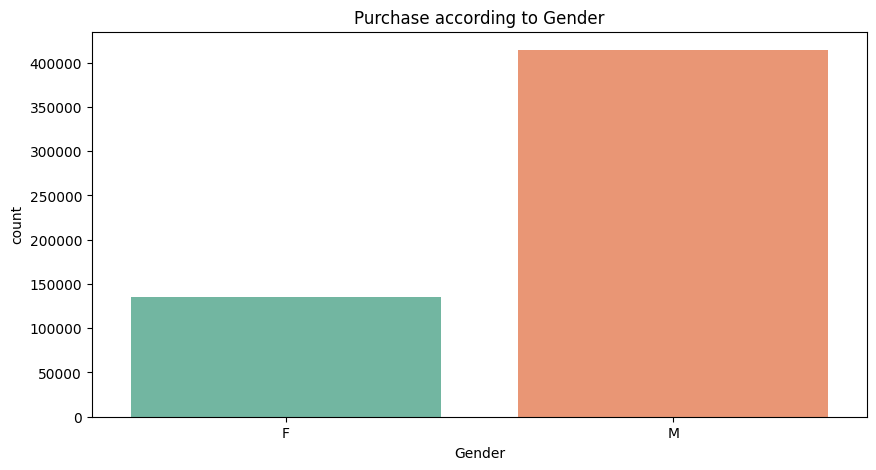

In [36]:
plt.figure(figsize=(10,5)) # Set the plot size
sns.countplot(x=df['Gender'], data=df, palette='Set2') #reate a count plot showing the number of occurrences for each gender using the 'Set2' color palette
plt.title('Purchase according to Gender') # Set the title name of the plot
plt.show() # Display the plot


**The purchase distribution shows a significant imbalance between genders. Out of a total of 338,798 purchase records, male customers made 255,553 purchases (approximately 75%), while female customers made only 83,245 purchases (approximately 25%). This indicates that male customers contribute nearly three times more purchases than female customers. This imbalance may reflect that the business attracts more male buyers, or that male customers shop more frequently. Further analysis is needed to determine whether this difference is driven by product categories, marketing focus, or the overall customer demographic composition.**

In [37]:
df.groupby('Age')['Purchase'].count() # Count the number of purchase according to age

,Purchase
Age,
0-17,15102
18-25,99660
26-35,219587
36-45,110013
46-50,45701
51-55,38501
55+,21504


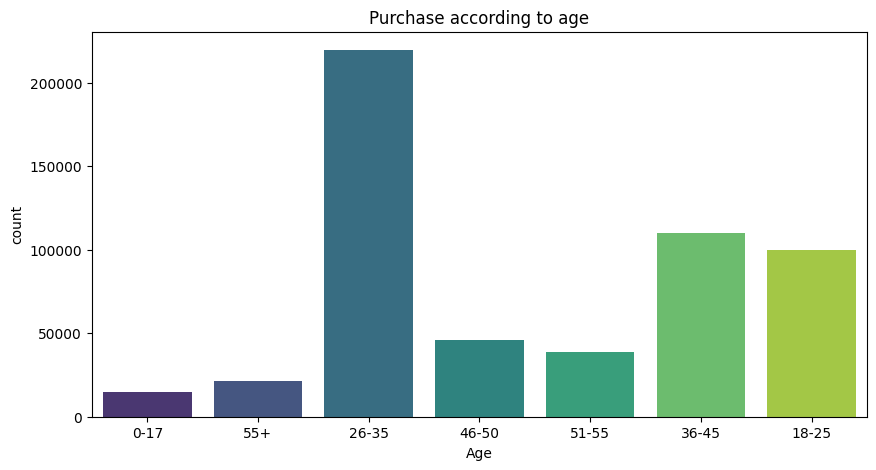

In [38]:
plt.figure(figsize=(10,5)) # Set the size of the plot
sns.countplot(x=df['Age'],data=df,palette='viridis') # create a count plot showing the number of occurrences for age using the viridis color palette
plt.title('Purchase according to age') # Set the title of the plot
plt.show() # Display the plot

**The purchase behavior varies significantly across age groups. Out of 549,068 total purchase entries, the 26–35 age group is the dominant customer segment, contributing the highest number of purchases at 219,587 (approximately 40%). The second most active group is 36–45, with 110,013 purchases (around 20%), followed by the 18–25 group with 99,660 purchases (about 18%).Customers aged 46–50 and 51–55 contribute 45,701 (8.3%) and 38,501 (7%) respectively, while the youngest (0–17) and oldest (55+) groups show the lowest purchase activity—2.7% and 3.9% of total purchases.This distribution indicates that the company’s primary customer base is adults aged 26–45, who together account for nearly 60% of all purchases. This age dominance may reflect their higher purchasing power, lifestyle needs, or alignment with the product offerings. Further analysis can explore which categories appeal most to each age group and how marketing strategies could target lower-engagement age segments**

In [39]:
df['Marital_Status']=df['Marital_Status'].map({0:'Single',1:'Married'}) #  Map 'Marital_Status' from 0/1 to 'Single'/'Married' for better readability


In [40]:
df.groupby('Marital_Status')['Purchase'].count() # Count the number of purchase according to Marital_Status

,Purchase
Marital_Status,
Married,225337
Single,324731


Text(0.5, 1.0, 'Purchase behaviour according to Marital_Status')

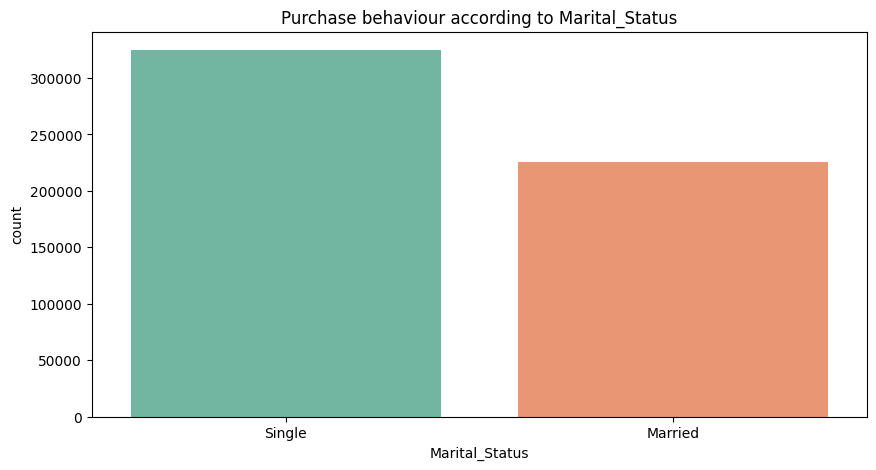

In [41]:
plt.figure(figsize=(10,5)) # Set the size of the plot
sns.countplot(x=df['Marital_Status'],data=df,palette='Set2') #Visualize the distribution of 'Marital_Status' using a count plot with the 'Set2' color palette
plt.title('Purchase behaviour according to Marital_Status') # Set the title name of the plot


**The data shows a clear difference in purchasing activity between marital groups. Out of a total of 550,068 purchases, single customers account for 324,731 purchases (about 59%), while married customers contribute 225,337 purchases (about 41%).**

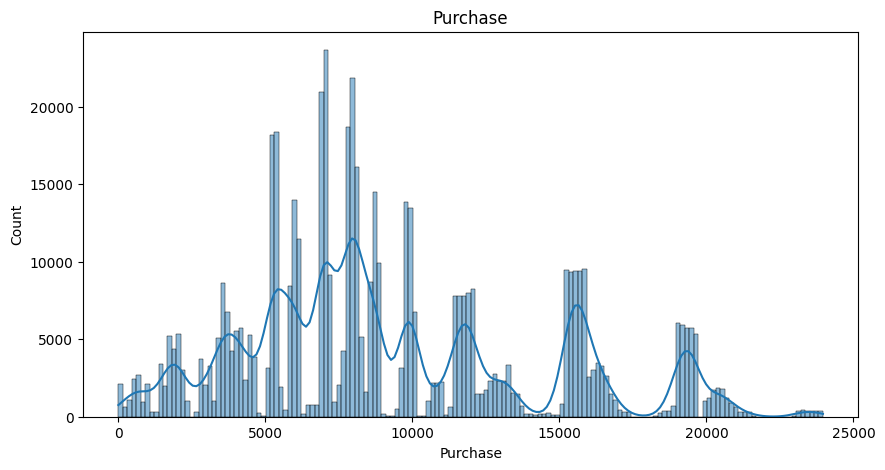

In [42]:
plt.figure(figsize=(10,5)) # Set the figure Size of the plot
sns.histplot(df['Purchase'],kde=True) # Plot a histogram of 'Purchase' amounts with a KDE curve to visualize the distribution
plt.title('Purchase') # Set the title name of the plot
plt.show() # Display the plot

**The histogram shows how frequently different purchase amounts occur in the dataset. The x-axis represents the purchase amount, while the y-axis shows how many customers spent that amount. The distribution is multi-modal — meaning there are several peaks — which suggests that many customers tend to purchase in specific price ranges rather than a smooth continuous pattern.The highest concentration of purchases occurs roughly between 5,000 and 10,000, indicating this is the most common spending range. There are additional noticeable peaks around 12,000, 15,000, and 20,000, showing that certain predefined price points or product bundles are popular.The KDE curve overlays the histogram and smooths out these variations, clearly showing the dominant spending clusters. Overall, this suggests that customer purchase behavior follows multiple patterns, likely influenced by fixed product prices, promotions, or pre-defined product categories**

# **Feature Engineering**

In [43]:
df['Gender'].unique() # Check the Gender type

array(['F', 'M'], dtype=object)

In [44]:
df['Gender']=df['Gender'].map({'F':0,'M':1}).astype(int) # Mapping the Gender with 0 and 1 and convert it to integer data type

In [45]:
df['Age'].unique() # check the unique age type

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [46]:
df['Age']=df['Age'].map({'0-17':1,'18-25':1,'26-35':2, # Mapping the age with 1,2,3,4,5,6 and convert it to integer data type
                         '36-45':3,'46-50':4,'51-55':5,'55+':6}).astype(int)

In [47]:
df['Marital_Status']=df['Marital_Status'].map({"Single":0,'Married':1}).astype(int) # Convert the marital status to integer data type by mapping

In [48]:
df['Product_ID'].unique() # check the each unique product ID

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00370293',
       'P00371644', 'P00370853'], dtype=object)

In [49]:
LabelEncoder=LabelEncoder()
df['Product_ID']=LabelEncoder.fit_transform(df['Product_ID']) # Covert Product ID to integer data by label encoding

In [50]:
df['Stay_In_Current_City_Years'].unique() # Check the unique current city year

array(['2', '4+', '3', '1', '0'], dtype=object)

In [51]:
df['Stay_In_Current_City_Years']=LabelEncoder.fit_transform(df['Stay_In_Current_City_Years']) # Convert the feature in numerical feature by label encoding

In [52]:
df['City_Category'].unique() # cheeck the unique cit category

array(['A', 'C', 'B'], dtype=object)

In [53]:
df['City_Category']=LabelEncoder.fit_transform(df['City_Category']) # Convert the city category in numerical data.

In [54]:
df.info() # After feature check the data type again, is there any categorical data or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  int64  
 2   Gender                      550068 non-null  int64  
 3   Age                         550068 non-null  int64  
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  int64  
 6   Stay_In_Current_City_Years  550068 non-null  int64  
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 50.4 MB


# **Feature Selection**

In [62]:
df.drop(['User_ID', 'Product_ID'], axis=1, inplace=True)# Drop the unnecessary features


# **Correlation Matrix**

In [64]:
df.corr() # Check the correlation among variables

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Gender,1.000000,-0.008748,0.117291,-0.004515,0.014660,-0.011603,-0.045594,-0.015300,0.014978,0.060346
Age,-0.008748,1.000000,0.096544,0.134134,-0.006083,0.304146,0.061424,0.043764,0.029687,0.014962
Occupation,0.117291,0.096544,1.000000,0.034479,0.030005,0.024280,-0.007618,-0.000317,0.007265,0.020833
City_Category,-0.004515,0.134134,0.034479,1.000000,0.019946,0.039790,-0.014364,-0.009777,-0.001292,0.061914
Stay_In_Current_City_Years,0.014660,-0.006083,0.030005,0.019946,1.000000,-0.012819,-0.004213,-0.001368,0.001148,0.005422
Marital_Status,-0.011603,0.304146,0.024280,0.039790,-0.012819,1.000000,0.019888,0.012507,0.010695,-0.000463
Product_Category_1,-0.045594,0.061424,-0.007618,-0.014364,-0.004213,0.019888,1.000000,0.373686,0.082711,-0.343703
Product_Category_2,-0.015300,0.043764,-0.000317,-0.009777,-0.001368,0.012507,0.373686,1.000000,0.320195,-0.179309
Product_Category_3,0.014978,0.029687,0.007265,-0.001292,0.001148,0.010695,0.082711,0.320195,1.000000,-0.012261
Purchase,0.060346,0.014962,0.020833,0.061914,0.005422,-0.000463,-0.343703,-0.179309,-0.012261,1.000000


<Axes: >

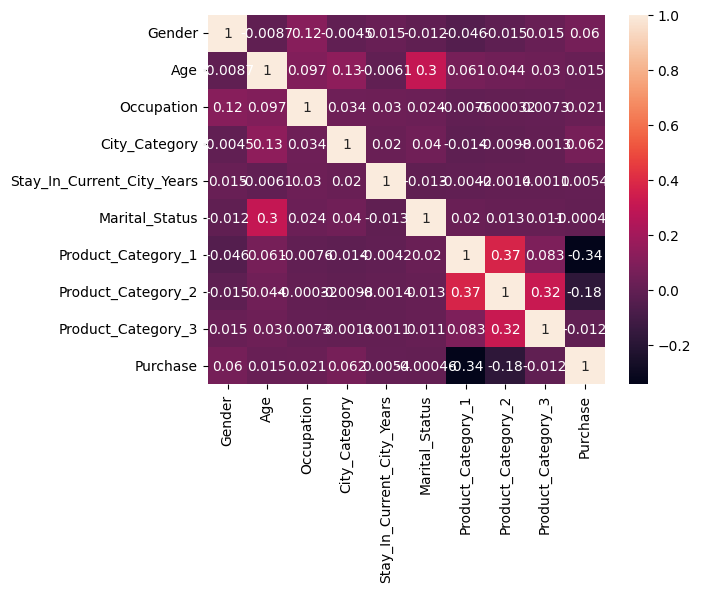

In [65]:
sns.heatmap(df.corr(),annot=True) # Visualization of correlation of matrix

**This correlation heatmap clearly shows that a customer's personal details—like their age, gender, job, and marital status—are not strong factors in determining how much they spend. Nearly all those correlations with Purchase are extremely close to zero. The strongest, though still only moderate, relationship is with Product Category 1 (at 0.34). In essence, to understand why someone spends a certain amount, the best clue is what category of product they are buying, not who they are as a person**